<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/Reddes_Neuronales_Artificiales_Introducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccción a las redes neuronales artificiales

Las [redes neuronales artificiales](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-14e5c02bafe) (también conocidas como sistemas conexionistas) son un modelo computacional vagamente inspirado en el comportamiento observado en su homólogo biológico. Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

>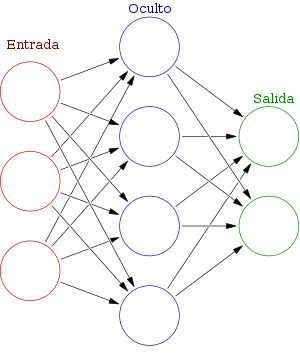


La neurona de [McCulloch-Pitts](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1) es una unidad de cálculo que intenta modelar el comportamiento de una neurona "natural", similares a las que constituyen del cerebro humano. Ella es la unidad esencial con la cual se construye una red neuronal artificial.

El resultado del cálculo en una neurona consiste en realizar una suma ponderada de las entradas, seguida de la aplicación de una función no lineal, como se ilustra en la siguiente figura:

>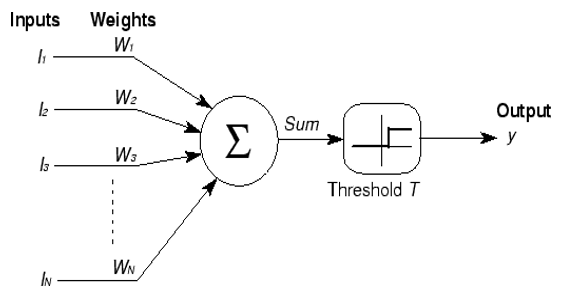

La [teoría Hebbiana](https://es.wikipedia.org/wiki/Teor%C3%ADa_hebbiana) describe un mecanismo básico de plasticidad sináptica en el que el valor de una conexión sináptica se incrementa si las neuronas de ambos lados de dicha sinapsis se activan repetidas veces de forma simultánea. Introducida por Donald Hebb, en 1949, es también llamada regla de Hebb, postulado de aprendizaje de Hebb o Teoría de la Asamblea Celular.

Basados en los conceptos anteriores se modelan las redesde neuronales artificiales.

# Poder expresivo de una neurona solo


# Una sola neurona no puede modelar el XOR


# Neuronas multicapas




